# PCA 와 Linear Regression 

In [3]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [3]:
import warnings

warnings.filterwarnings(action='ignore') 

In [4]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/컬럼정리.csv'
map = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(의료지도).csv'

* 데이터 불러오기

In [5]:
data = pd.read_csv(healthcare)
die = pd.read_csv(map)

In [6]:
data.columns

Index(['Unnamed: 0', '시도코드', '시도명', '십만명당 회피가능사망수', '총 인구', '주민등록인구',
       '면적(2019)', '인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수',
       '면적당 의료인수', '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)',
       '면적당 의료인수(병원)', '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)'],
      dtype='object')

In [ ]:
die.columns

Index(['Unnamed: 0', '시도코드', '시도명', '대상자건수', '지표비율'], dtype='object')

In [ ]:
data = data.join(die['지표비율'])
data.head(3)

,Unnamed: 0,시도코드,시도명,십만명당 회피가능사망수,총 인구,주민등록인구,면적(2019),인구당 요양급여비,인구당 입내원일수,천명당 의료인수,천명당 의사수,천명당 간호사수,면적당 의료인수,면적당 의료인수(상급),면적당 의료인수(상급+종합),면적당 의료인수(종합),면적당 의료인수(병원),면적당 의료인수(의원),천명당 병상수,천명당 요양기관수,천명당 요양기관수(상급),천명당 요양기관수(상급+종합),천명당 요양기관수(종합),천명당 요양기관수(병원),천명당 요양기관수(의원),면적당 요양기관수,면적당 요양기관수(상급),면적당 요양기관수(상급+종합),면적당 요양기관수(종합),면적당 요양기관수(병원),면적당 요양기관수(의원),지표비율
0,0,11,서울특별시,66.496942,9639541,9729107,605237001.6,19486.007369,0.434774,11.805914,3.120430,5.419511,0.000128,0.000054,0.000086,0.000032,0.000013,0.000028,9.1,0.917248,0.001349,0.005913,0.004565,0.023653,0.895063,0.000015,2.147919e-08,9.417798e-08,7.269879e-08,3.767119e-07,0.000014,100.0
1,1,21,부산광역시,86.370176,3372692,3413841,770073413.2,25404.979491,0.567675,10.846434,2.345745,5.423217,0.000029,0.000008,0.000018,0.000010,0.000006,0.000005,20.5,0.754575,0.001186,0.008598,0.007412,0.042103,0.706854,0.000003,5.194310e-09,3.765875e-08,3.246444e-08,1.843980e-07,0.000003,83.0
2,2,22,대구광역시,61.359540,2429940,2438031,883517307.5,20611.235100,0.458401,10.700028,2.423267,5.150468,0.000019,0.000007,0.000010,0.000003,0.000005,0.000004,15.6,0.799826,0.002058,0.006585,0.004527,0.044857,0.741994,0.000002,5.659199e-09,1.810944e-08,1.245024e-08,1.233705e-07,0.000002,111.0


In [ ]:
# data['Label']열 만들기 
data['Label'] = ''
for i in range(len(data['지표비율'])):
  if data['지표비율'][i] <= 90:
    data['Label'][i] = '우수'
  elif data['지표비율'][i] <= 100:
    data['Label'][i] = '보통'
  elif data['지표비율'][i] <= 110:
    data['Label'][i] = '열악'    
  else:
    data['Label'][i] = '매우열악'

In [8]:
del data['Unnamed: 0']

In [9]:
data.columns = ['시도코드', '시도명','총 인구', '주민등록인구', '면적(2019)',
       '인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)', '십만명당 회피가능사망수']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   시도코드              17 non-null     int64  
 1   시도명               17 non-null     object 
 2   총 인구              17 non-null     float64
 3   주민등록인구            17 non-null     int64  
 4   면적(2019)          17 non-null     int64  
 5   인구당 요양급여비         17 non-null     float64
 6   인구당 입내원일수         17 non-null     float64
 7   천명당 의료인수          17 non-null     float64
 8   천명당 의사수           17 non-null     float64
 9   천명당 간호사수          17 non-null     float64
 10  면적당 의료인수          17 non-null     float64
 11  면적당 의료인수(상급)      17 non-null     float64
 12  면적당 의료인수(상급+종합)   17 non-null     float64
 13  면적당 의료인수(종합)      17 non-null     float64
 14  면적당 의료인수(병원)      17 non-null     float64
 15  면적당 의료인수(의원)      17 non-null     float64
 16  천명당 병상수           17 non-null     float64
 17 

# PCA 주성분 분석(실패)
- PCA 주성분 분석을 통해 분산값이 가장긴 지표를 활용해 Linear Regression을 진행했으나 이상한 값들이 도출되어 고려하지 않기로 함
  - 17개도시를 분석하는데 feature수가 부족했을 것이라 생각함 

In [ ]:
# 데이터 분리 
x = data[['인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)', '십만명당 회피가능사망수']].values
       
y = data['Label'].values

In [ ]:
# Scaler 값으로 면환 
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)

features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.0625      0.4366947   0.56285851 -0.51869904 -0.58395153 -0.43294074
  -0.50283623 -0.42820956 -0.49448235 -0.50285277 -0.5643652  -0.47014627
   0.02573104 -0.64685301 -0.41544732  0.08636607  0.17139848 -0.11613063
  -0.64529954 -0.48804873 -0.51549188 -0.54845191 -0.53662515 -0.55839441
  -0.4823345 ]
 [ 0.4366947   1.0625      0.95828045  0.22039806 -0.0365991   0.32757916
  -0.40118637 -0.33723633 -0.39241953 -0.40178309 -0.39936598 -0.41060725
   0.73828928 -0.23623311  0.04205499  0.58924511  0.59056951  0.58601074
  -0.22842389 -0.40787527 -0.36424769 -0.39157668 -0.38376262 -0.38799435
  -0.40727896]
 [ 0.56285851  0.95828045  1.0625      0.02596301 -0.14003799  0.0797054
  -0.4789597  -0.40828626 -0.46901389 -0.47471316 -0.48797644 -0.482244
   0.61192938 -0.28339871  0.03170027  0.40442298  0.40476126  0.41719254
  -0.28454876 -0.48004254 -0.44921122 -0.48731407 -0.47826843 -0.47348092
  -0.47830475]
 [-0.51869904  0.22039806  0.02596301  1.0625      0.99419437  1.03700

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [ ]:
eig_vals

array([ 1.41393282e+01,  6.35490696e+00,  2.60776362e+00,  1.25936979e+00,
        9.12909840e-01,  5.00905697e-01,  2.97218368e-01,  2.16194737e-01,
        1.17578555e-01,  7.75569328e-02,  5.72792560e-02,  1.58763648e-02,
        2.63189783e-03,  1.92534433e-03,  9.96349280e-04,  5.81355942e-05,
        5.87552956e-16, -5.83573485e-16,  4.45933810e-16,  3.75084309e-16,
       -3.59281162e-16, -2.61739446e-16, -1.18472335e-16,  7.49143371e-17,
        2.00737065e-17])

* 53 % 데이터 사용

In [ ]:
eig_vals[0] / sum(eig_vals)

0.5323041186443811

In [ ]:
projected_X = x_std.dot(eig_vecs.T[0])

* pca

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component1', 'principal component2', 'principal component3'])

In [ ]:
principalDf.head()

,principal component1,principal component2,principal component3
0,-5.300721e+09,-1663.006664,-2.055332
1,-5.135885e+09,4219.248223,-0.413166
2,-5.022441e+09,-599.774087,2.181092
3,-4.842700e+09,-1059.868766,-1.796943
4,-5.404822e+09,969.111163,11.774111


In [ ]:
pca.explained_variance_ratio_ * 100

array([1.00000000e+02, 2.44232717e-11, 4.42399076e-17])

In [ ]:
# PCA 모델링 
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_scaled)

# data transform
x_pca = pca.transform(x_scaled)

# data shape
print(f'original data: {str(x_scaled.shape)}')
print(f'transform data: {str(x_pca.shape)}')

original data: (17, 25)
transform data: (17, 17)


In [ ]:
import plotly.express as px

data = data
features = ['인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)']

pca = PCA()
components = pca.fit_transform(data[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions = range(3),
    color = data["Label"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

data = data
features = ['인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '면적당 의료인수',
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '면적당 의료인수(병원)',
       '면적당 의료인수(의원)', '천명당 병상수', '천명당 요양기관수', '천명당 요양기관수(상급)',
       '천명당 요양기관수(상급+종합)', '천명당 요양기관수(종합)', '천명당 요양기관수(병원)', '천명당 요양기관수(의원)',
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',
       '면적당 요양기관수(병원)', '면적당 요양기관수(의원)','십만명당 회피가능사망수']

pca = PCA(n_components=3)
components = pca.fit_transform(x)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=data['Label'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text = feature
    )
fig.show()

- 십만명당 회피 가능 사망자수와 여러 feature 들의 상관관계를 분석해서 어느 정도 영향을 미치는 요소들을 선정 
- PCA 주성분 분석을 통해서 그래프를 그렸음 
 - 궁금점 : Explained value ration = 100 이 나오는 이유, 그래프가 수직인이유.. 

 - 이 PCA 주성분 모델로 무엇을 할 수 있는가? 
  


# Linear Regression
  - 상관관계를 확인하여 값이 높은 값만 feature에 담음 
    - 요양기관수는 대체적으로 연관성이 없어 불포함 
    - 병원, 의원수 제외
  - y : 십만명당 회피가능 사망자수 예측

In [11]:
data_set = data[['인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', 
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '천명당 병상수', 
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)','십만명당 회피가능사망수']]

In [17]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   인구당 요양급여비         17 non-null     float64
 1   인구당 입내원일수         17 non-null     float64
 2   천명당 의료인수          17 non-null     float64
 3   천명당 의사수           17 non-null     float64
 4   천명당 간호사수          17 non-null     float64
 5   면적당 의료인수(상급)      17 non-null     float64
 6   면적당 의료인수(상급+종합)   17 non-null     float64
 7   면적당 의료인수(종합)      17 non-null     float64
 8   천명당 병상수           17 non-null     float64
 9   면적당 요양기관수         17 non-null     float64
 10  면적당 요양기관수(상급)     17 non-null     float64
 11  면적당 요양기관수(상급+종합)  17 non-null     float64
 12  면적당 요양기관수(종합)     17 non-null     float64
 13  십만명당 회피가능사망수      17 non-null     float64
dtypes: float64(14)
memory usage: 2.0 KB


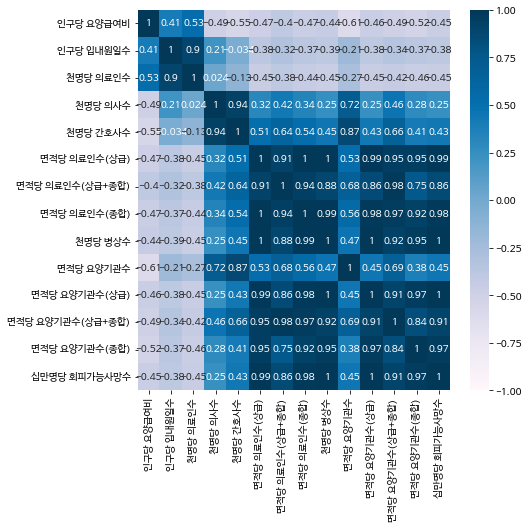

In [13]:
# 상관계수 분석
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(data_set.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'PuBu', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

plt.savefig('Heatmap.png')

In [ ]:
# feature(x), target 분류 
x = data[['인구당 요양급여비', '인구당 입내원일수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', 
       '면적당 의료인수(상급)', '면적당 의료인수(상급+종합)', '면적당 의료인수(종합)', '천명당 병상수', 
       '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)',]]
       
y = data['십만명당 회피가능사망수']

In [ ]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=2021)

In [ ]:
# Model Building 
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# training the model 
clf.fit(x_train, y_train)

# predicting the output
y_pred = clf.predict(x_test)

* 정확도(?)
  - 학습마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
  - 결정계수값이 클 수록 모형의 예측능력이 좋다고 함

In [ ]:
accuracy = clf.score(x_test, y_test)
print ("Linear Regression test file accuracy:"+ str(accuracy))


Linear Regression test file accuracy:0.919159070920806


* 실제값과 예측값 비교

In [ ]:
y_pred = clf.predict(x_test)
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

          Actual     Predicted
3   1.479415e-06  1.508998e-06
16  2.421324e-07  2.696647e-07
4   1.891701e-06  2.240848e-06
2   2.040707e-06  2.235707e-06


* R2 score
  - 통계학 회귀분석에서 자주 쓰이는 회귀 평가 지표.
  - 실제 값의 분산 대비 예측 값의 분산 비율을 나타냅니다.
  - 1에 가까울 수록 좋은 모델, 0에 가까울 수록 나쁨, **음수가 나오면 잘못 평가** 되었음을 의미합니다.

In [ ]:
from sklearn.metrics import r2_score

r2_ = r2_score(y_test, y_pred)

print('r2 score = {:.3f}'.format(r2_))

r2 score = 0.919


* 오차 확인

In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.503154451517455e-07
Mean Squared Error: 4.0390388376034265e-14
Root Mean Squared Error: 2.0097360119188358e-07


* 예측값과 실제값 확인

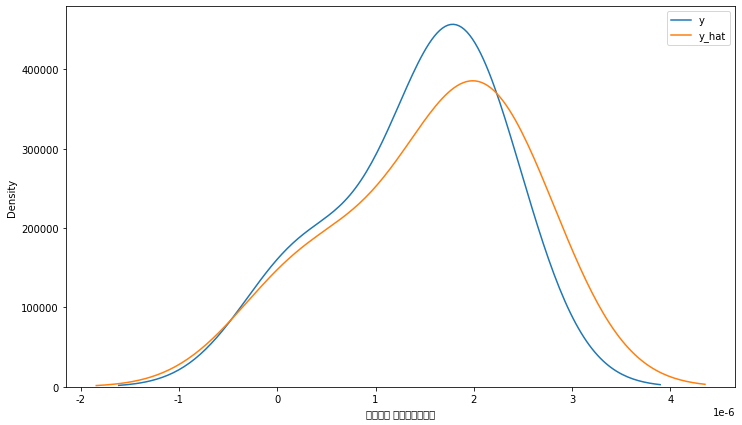

In [ ]:
y_pred = clf.predict(x_test)

plt.figure(figsize=(12,7))
ax1 = sns.kdeplot(y_test, label='y')
ax2 = sns.kdeplot(y_pred, label='y_hat', ax= ax1)
plt.legend()   
plt.show()

## Polynomial Regression

In [ ]:
# Model Building 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

# training the model 
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

# predicting the output
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)

In [ ]:
print ("Linear Regression test file accuracy:"+ str(r_square))

Linear Regression test file accuracy:0.5179779525592307


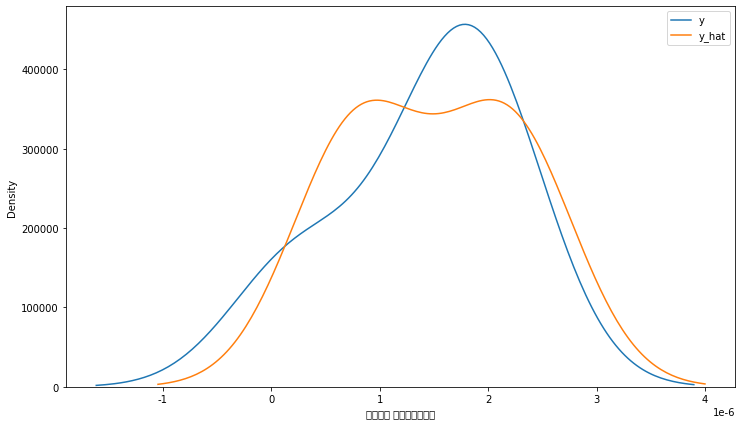

In [ ]:
y_poly  = pr.predict(x_test_poly)

plt.figure(figsize=(12,7))
ax1 = sns.kdeplot(y_test, label='y')
ax2 = sns.kdeplot(y_poly, label='y_hat', ax= ax1)
plt.legend()   
plt.show()

### Result

In [ ]:
test = pd.DataFrame({'Polymal_r제곱': [r_square],
                     'Linear_r제곱': [r2_ ],
                     'MAE': [metrics.mean_absolute_error(y_test, y_pred)],
                     'MSE': [metrics.mean_squared_error(y_test, y_pred)],
                     'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))]}, index = [0])
test

,Polymal_r제곱,Linear_r제곱,MAE,MSE,RMSE
0,0.517978,0.919159,1.503154e-07,4.039039e-14,2.009736e-07
